# resources

https://en.wikipedia.org/wiki/Decision_tree - name of that model says everything that you need to understand what is it about

https://en.wikipedia.org/wiki/Ensemble_learning - usually we don't use one tree but many

https://en.wikipedia.org/wiki/Boosting_(machine_learning) - type of ensemble learning, we will discuss it today

http://xgboost.readthedocs.io/en/latest/ - xgboost documentation, read it before

# imports 

In [46]:
import xgboost as xgb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from ipywidgets import interact
from functools import lru_cache

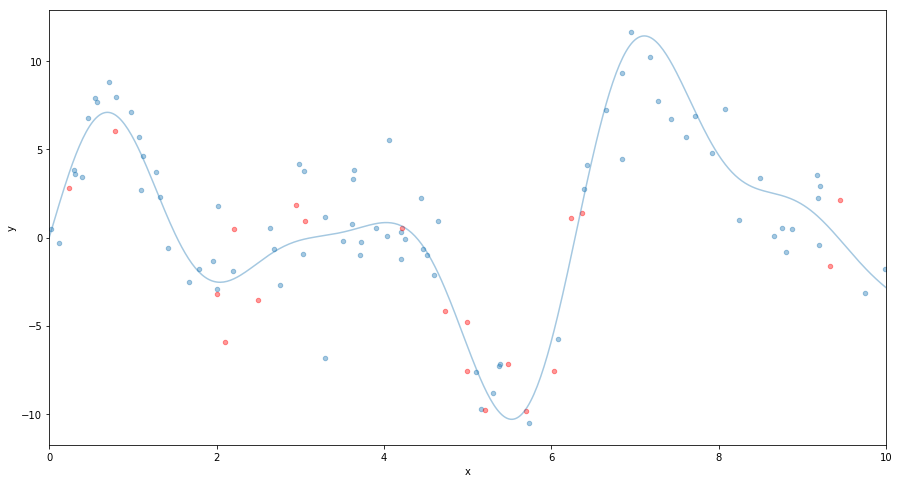

In [47]:
FIGSIZE = (15, 8)

def ground_truth(x):
    return x * np.sin(x) + 5 * np.sin(2 * x) + 2 * np.sin(3 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(15)
    X = np.random.uniform(0, 10, size=n_samples)[:, np.newaxis]
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(100)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(alpha=0.4, s=20):
    fig = plt.figure(figsize=FIGSIZE)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha)
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}
    
plot_data()
plt.show()

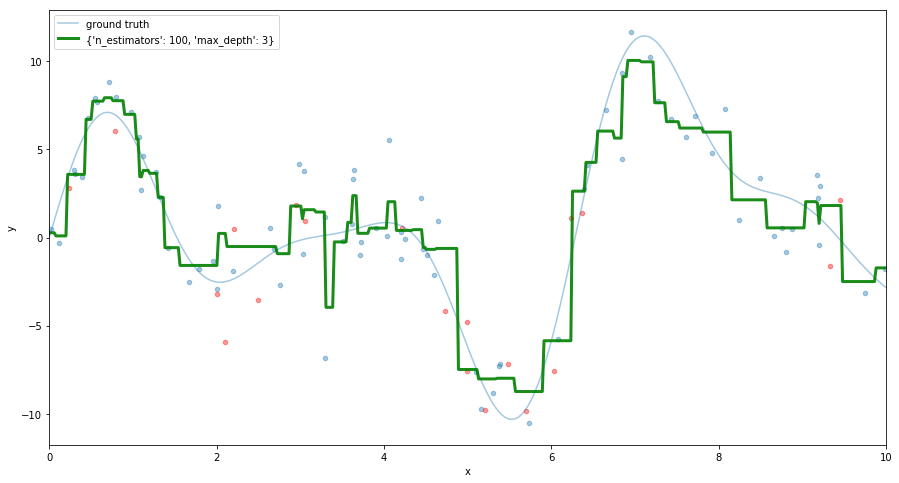

In [45]:
plot_data()
est = xgb.XGBRegressor(n_estimators=100, max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label=str(params), color='g', alpha=0.9, linewidth=3)
plt.legend()
plt.show()

In [39]:
@lru_cache(maxsize=None)
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

@lru_cache(maxsize=None)
def train_xgb(params):
    params = dict(list(params))
    return xgb.XGBRegressor(**params).fit(X_train, y_train)

In [42]:
interact_params = {
    'n_estimators': [fib(x) for x in range(2, 20)],
    'max_depth': [fib(x) for x in range(2, 20)]
}

In [44]:
@interact(**interact_params)
def plot(**params):
    plot_data()
    est = train_xgb(tuple(params.items()))
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label=str(params), color='g', alpha=0.9, linewidth=3)
    plt.legend(loc='upper left')
    plt.show()

A Jupyter Widget